In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale


### Load the dataset

In [3]:
hr_images = np.load(f'../data/hr_images.npz')['hr_images']
# input/output images should have pixel values in the range [0, 1]
# For 8-bit images the max. pixel value is 255
hr_images = hr_images / 255.0
hr_images = hr_images.astype(np.float32)

### We will display some images. These images will be going through downsample process then we use both to train.

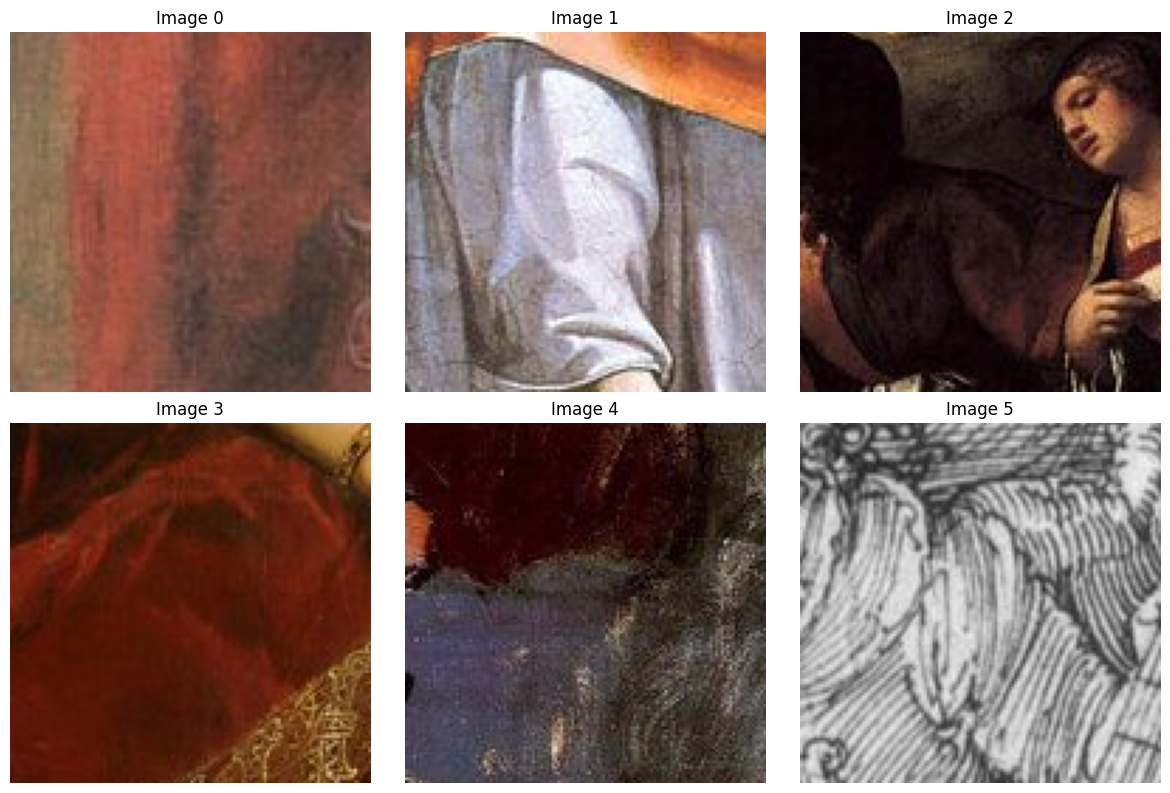

In [4]:
# Display a few sample images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(hr_images[i])
    ax.set_title(f"Image {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Shape: {hr_images.shape}")
print(f"Data type: {hr_images.dtype}")
print(f"Min value: {hr_images.min()}")
print(f"Max value: {hr_images.max()}")
print(f"Mean value: {hr_images.mean():.4f}")
print(f"Memory usage: {hr_images.nbytes / (1024**2):.2f} MB")

Shape: (17354, 128, 128, 3)
Data type: float32
Min value: 0.0
Max value: 1.0
Min value: 0.0
Max value: 1.0
Mean value: 0.4476
Memory usage: 3253.88 MB
Mean value: 0.4476
Memory usage: 3253.88 MB


### We will downscale the images by  a factor of 4 using bicubic interpolation from 128x128 to 32x32.

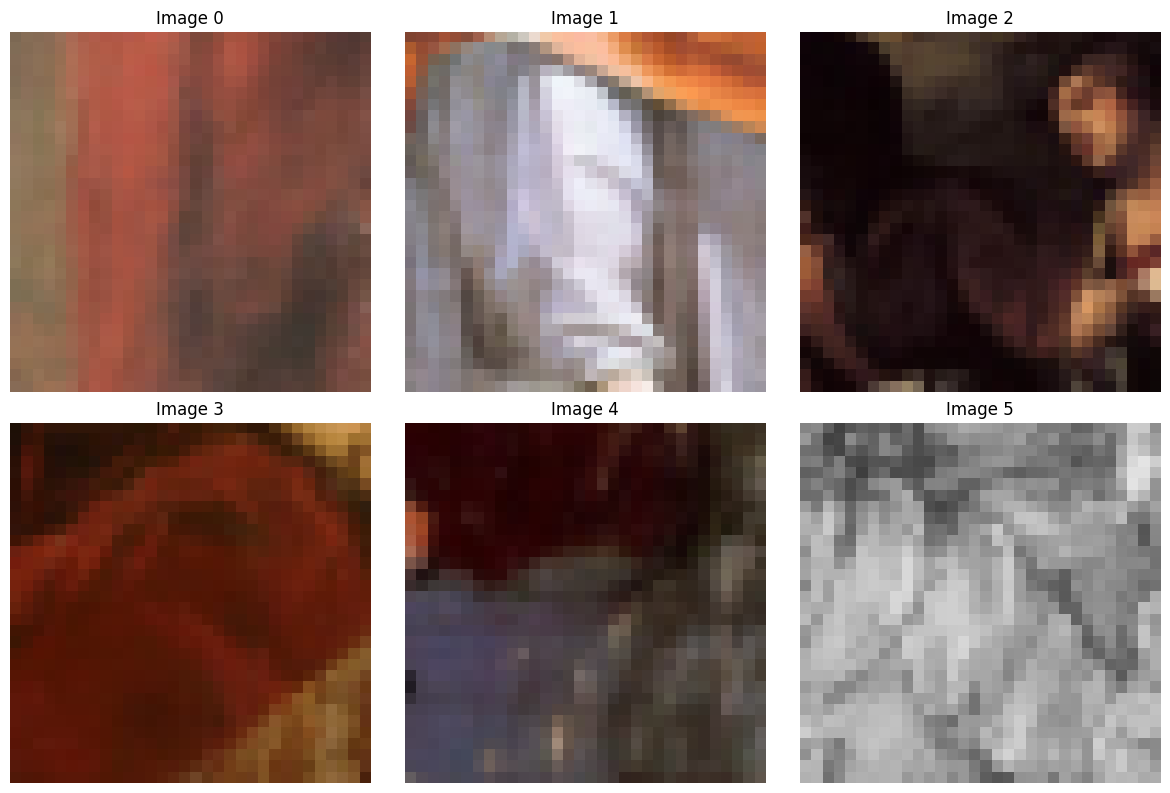

In [6]:
lr_images = np.stack([
    rescale(
        img,
        scale=0.25,
        anti_aliasing=True,
        channel_axis=-1,
        preserve_range=True
    )
    for img in hr_images
]).astype(hr_images.dtype)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(lr_images[i])
    ax.set_aspect("equal", adjustable="box")
    ax.set_title(f"Image {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
print(f"Shape: {lr_images.shape}")
print(f"Data type: {lr_images.dtype}")
print(f"Min value: {hr_images.min()}")
print(f"Max value: {hr_images.max()}")
print(f"Mean value: {hr_images.mean():.4f}")
print(f"Memory usage: {hr_images.nbytes / (1024**2):.2f} MB")

Shape: (17354, 32, 32, 3)
Data type: float32
Min value: 0.0
Min value: 0.0
Max value: 1.0
Max value: 1.0
Mean value: 0.4476
Memory usage: 3253.88 MB
Mean value: 0.4476
Memory usage: 3253.88 MB


### We will save both high-resolution and low-resolution images in a single .npz file for easy access during training. There is no augmentation for now.

In [9]:
np.savez(
    "../data/hr_lr_images.npz",
    lr=lr_images,
    hr=hr_images
)
